## 0.0 IMPORTS

In [1]:
# Imports
import numpy as np # manipulações de dados
import pandas as pd

import matplotlib.pyplot as plt # visualizações/ construção de gráficos
import seaborn as sns

import sklearn # machine learning
from sklearn.model_selection import train_test_split # divisão dos dados em treino e teste
from sklearn.preprocessing import StandardScaler     # padronização
from sklearn.linear_model import LinearRegression    # algoritmo de regressão linear
from sklearn.linear_model import Ridge               # algoritmo de ridge
from sklearn.linear_model import Lasso               # algoritmo lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score # funções para cálculo de métricas

sns.set_style('whitegrid') # definição do estilo de gráfico seaborn

%matplotlib inline 

import warnings # filtrando os warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### 0.1 Helper Functions

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Camila D'Angelo" --iversions

Author: Camila D'Angelo

seaborn   : 0.11.2
matplotlib: 3.4.3
pandas    : 1.4.2
numpy     : 1.20.3
sklearn   : 1.1.2



## LOADING DATA

In [4]:
# Carrega o dataset
dados = pd.read_csv('dados/dataset.csv')

In [5]:
# Check Shape: tamanho dos dados
dados.shape

(500, 5)

In [6]:
# Check Info: tipo de variáveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [7]:
# Amostra
# target: valor_total_gasto
dados.sample(10)

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
73,3.663105,34.555768,12.170525,39.131097,549.860590
95,4.615426,32.302748,12.815393,37.957810,576.025244
258,3.108911,32.745150,10.012583,38.354960,387.357073
310,3.414506,31.600512,12.222967,36.822753,479.172851
297,2.907095,33.136655,13.891313,39.220713,524.797628
293,3.287702,32.728521,10.131712,34.845612,393.857371
311,3.606087,34.318927,13.402332,37.292045,585.931844
249,4.746990,33.324241,11.084584,36.776017,562.082045
145,2.969640,33.437830,12.595420,36.262032,492.105052
419,3.336339,33.481931,11.918670,37.317705,503.175085


## Análise Exploratória de Dados

In [8]:
# Colunas
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [9]:
# Correlação (tabela)
dados.corr()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.060247,0.029143,-0.047582,0.809084
numero_medio_cliques_por_sessao,0.060247,1.000000,-0.027826,-0.034987,0.355088
tempo_total_logado_app,0.029143,-0.027826,1.000000,0.082388,0.499328
tempo_total_logado_website,-0.047582,-0.034987,0.082388,1.000000,-0.002641
valor_total_gasto,0.809084,0.355088,0.499328,-0.002641,1.000000


> **Análise**

Forte Correlação: **tempo_cadastro_cliente** e **valor_total_gasto** possui forte correlação positiva de 0.8


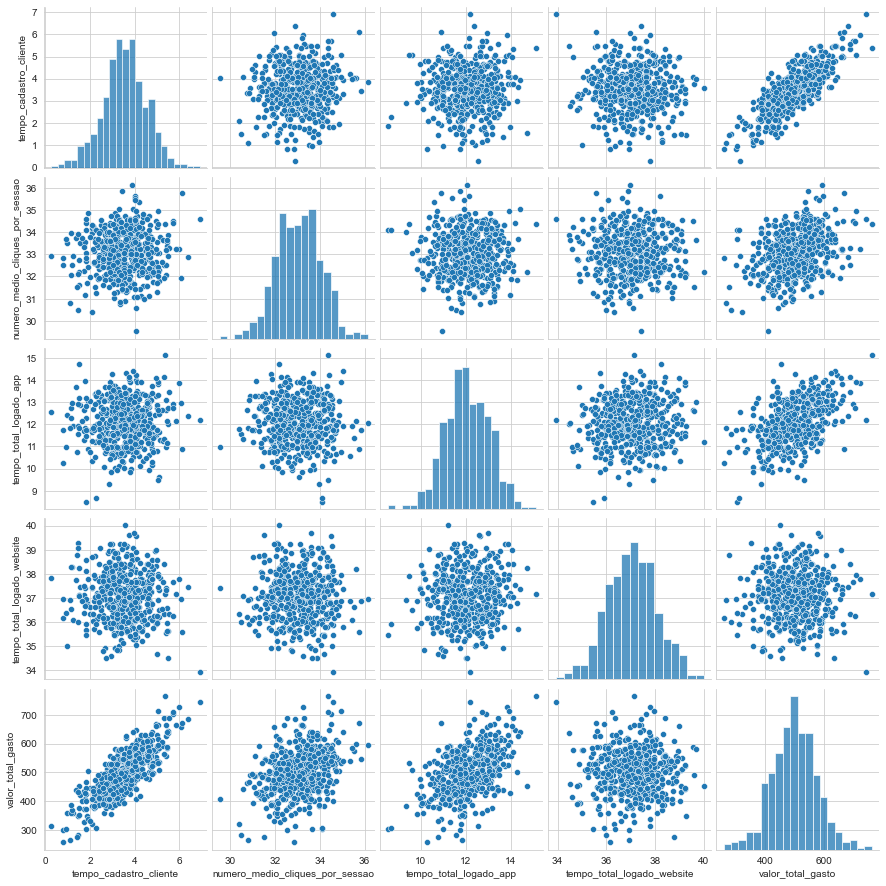

In [10]:
# Correlação (visual)
sns.pairplot(dados);

> **Análise**

As variavéis aparentam seguir uma distribuição normal

### Análise 1 - Relação Entre Tempo no Web Site e Valor Gasto (target)

<Figure size 1296x864 with 0 Axes>

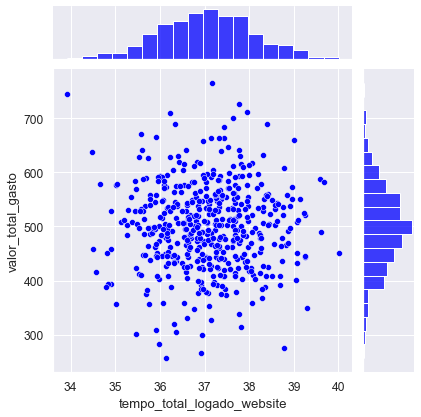

In [11]:
# Plot
plt.figure(figsize = (18, 12));
sns.set(font_scale = 1.1);
sns.jointplot(data = dados, # plot de junção
              x = 'tempo_total_logado_website', 
              y = 'valor_total_gasto',
              color = 'blue');

> **Análise**

* Podemos obervar através do histograma, que os dados estão normalmente distribuídos (seguem uma distribuição normal). 

* Podemos observar através do gráfico de dispersão, que parece **não haver uma correlação** entre essas duas variáveis. 

Vamos confirmar calculando o coeficiente de correlação entre elas.

In [12]:
# Correlação
dados[['tempo_total_logado_website', 'valor_total_gasto']].corr()

,tempo_total_logado_website,valor_total_gasto
tempo_total_logado_website,1.000000,-0.002641
valor_total_gasto,-0.002641,1.000000


> Como imaginavamos, o valor do corr é baixo (muito próximo de zero), ou sea,não parece haver correlação entre o **tempo logado no website** e o **valor gasto** pelos clientes.

### Análise 2 - Relação Entre Tempo na App e Valor Gasto (target)

In [13]:
# Colunas
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

<Figure size 1296x864 with 0 Axes>

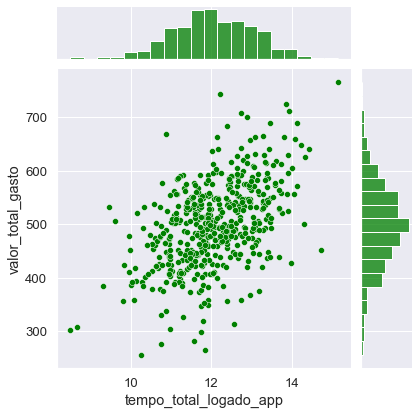

In [14]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados, 
              x = 'tempo_total_logado_app', 
              y = 'valor_total_gasto', 
              color = 'green')

> **Análise**

* Através do histogramas, podemos observar que os dados estão normalmente distribuídos (seguem uma distribuição normal). 

* Através do gráfico de dispersão, observamos que parece haver **correlação positiva** entre as duas variáveis. 

Vamos confirmar calculando o coeficiente de correlação entre elas.

In [15]:
# Correlação
dados[['tempo_total_logado_app', 'valor_total_gasto']].corr()

,tempo_total_logado_app,valor_total_gasto
tempo_total_logado_app,1.000000,0.499328
valor_total_gasto,0.499328,1.000000


> Através dp calculo do corr, vemos que os dados têm uma **correlação positiva moderada**. 

Sendo assim, podemos deduzir que o valor total gasto mensalmente tende a aumentar se o cliente passar mais tempo logado na app.

### Análise 3 - Relação Entre Tempo na App e Tempo de Cadastro (preditoras)

In [16]:
# Colunas
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

<Figure size 1296x864 with 0 Axes>

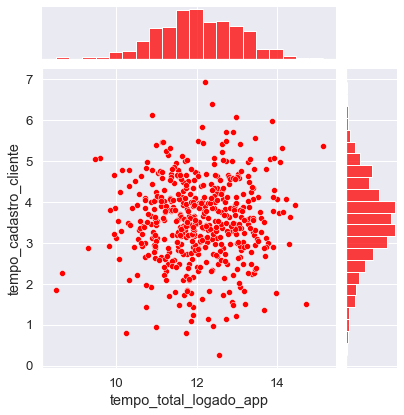

In [17]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados, 
              x = 'tempo_total_logado_app', 
              y = 'tempo_cadastro_cliente', 
              color = 'red')

> **Análise**

* Observando os histogramas, podemos ver que os dados estão normalmente distribuídos (seguem uma distribuição normal). 

* A partir do gráfico de dispersão podemos ver que os dados são muito densos no meio do gráfico, **não havendo uma correlação clara**. 

Podemos deduzir que existem muitos clientes que são membros há 3-4 anos e gastam aproximadamente 11,5 a 12,5 minutos na app.

### Análise 4 - Relação Entre Tempo de Cadastro e Valor Gasto (target)

In [18]:
# Colunas
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

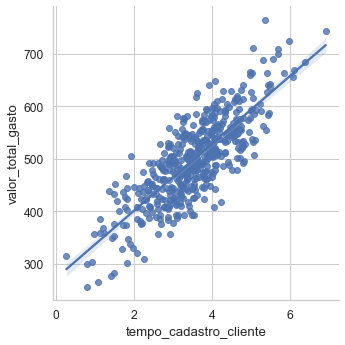

In [19]:
# Plot
sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.lmplot(y = "valor_total_gasto", x = "tempo_cadastro_cliente", data = dados)

In [20]:
# Correlação
dados[['tempo_cadastro_cliente', 'valor_total_gasto']].corr()

,tempo_cadastro_cliente,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.809084
valor_total_gasto,0.809084,1.000000


> **Análise**

* A partir do lmplot (regressão linear) e do coeficiente de correlação, podemos ver que o tempo de cadstro e o valor total gasto têm uma **forte correlação positiva**, ou seja, à medida que o cliente se torna mais antigo (mais tempo de cadastro), o valor total gasto por clientes também aumenta.

* Outra coisa a se notar é que a sombra ao redor da linha é muito fina, o que significa que os erros entre a estimativa (linha) e os pontos de dados são relativamente pequenos.

### Análise 5 - Relação Entre Tempo Logado na App e Tempo Logado no Web Site (preditoras)

<Figure size 1296x864 with 0 Axes>

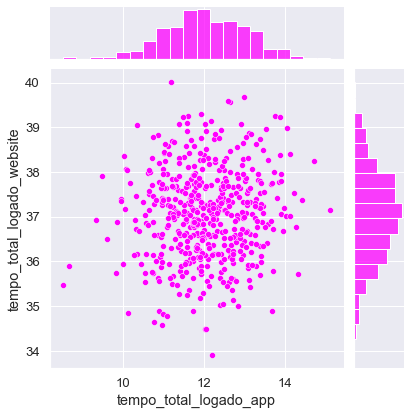

In [21]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados, x = 'tempo_total_logado_app', y = 'tempo_total_logado_website', color = 'magenta' )

> **Análise**

* Não detectamos problemas críticos e podemos seguir adiante. Vamos manter a variável preditora com baixa correlação e validar essa relação com a variável alvo no modelo final.

## Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

In [22]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [23]:
# Variáveis de entrada (variáveis preditoras)
X = dados[['tempo_cadastro_cliente', 
           'numero_medio_cliques_por_sessao',
           'tempo_total_logado_app', 
           'tempo_total_logado_website']]

In [24]:
# Variável de saída (variável alvo ou target)
y = dados['valor_total_gasto']

In [25]:
# Divisão em dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, 
                                                        test_size = 0.3, # 70% para treino e 30% para teste
                                                        random_state = 101) # definindo mesmo padrão aleatório

In [26]:
len(X_treino)

350

In [27]:
len(X_teste)

150

### Padronização

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(X_treino)

StandardScaler()

In [30]:
X_treino = scaler.transform(X_treino)

In [31]:
X_teste = scaler.transform(X_teste)

In [32]:
X_treino[:5]

array([[-0.21902935, -0.23735512,  0.33914084,  0.92765292],
       [ 1.8073082 ,  0.09393489,  1.05266311,  0.2388907 ],
       [-0.00962736, -0.47064535, -0.26005737,  0.81461639],
       [-0.06171807, -0.23157636, -0.19229742, -0.26198867],
       [-2.03669802, -1.54671013, -1.27813419,  1.65800995]])

In [33]:
X_teste[:5]

array([[-0.74134552,  0.35042401,  1.32428694,  0.85663193],
       [ 0.51634261,  0.33850011,  1.36472848,  0.1071885 ],
       [ 1.22462847, -0.84278168,  1.70184401,  0.88678948],
       [ 0.48199668, -0.30436824, -0.65228214, -1.76956776],
       [ 1.88519232, -0.14493923,  0.70658414, -1.44006612]])

# MACHINE LEARNING

##  Modelo 1: Construção, Treinamento e Avaliação com Regressão Linear (Benchmark)

**Documentação**: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [34]:
# Cria o modelo
modelo_v1 = LinearRegression()

In [35]:
# Treinamento do modelo
modelo_v1.fit(X_treino, y_treino)

LinearRegression()

In [36]:
print('Coeficientes: \n', modelo_v1.coef_)

Coeficientes: 
 [63.74220716 26.23901606 38.57185551  0.6847366 ]


In [37]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


### Avaliação do Modelo

In [38]:
# Previsões com dados de teste
pred_v1 = modelo_v1.predict(X_teste)

In [39]:
# Imprime as 10 primeiras previsões
pred_v1[:10]

array([513.06429807, 593.96597774, 621.6550031 , 495.82353395,
       642.08919639, 615.61800045, 592.1273355 , 493.61084354,
       457.58835597, 532.03644608])

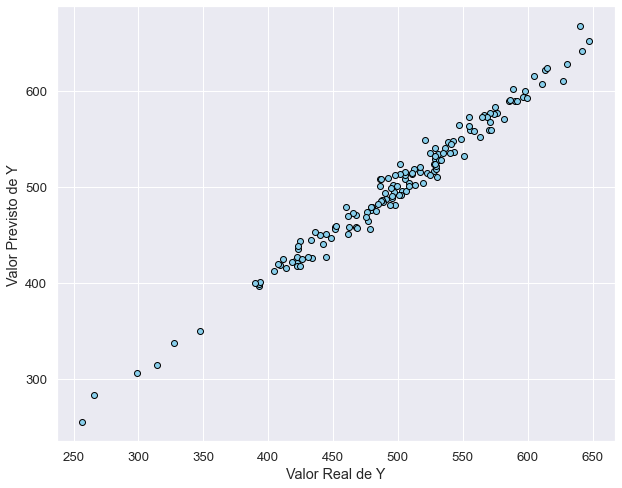

In [40]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v1, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

> **Análise**

A partir do gráfico de dispersão, podemos ver que há uma **correlação muito forte** entre os y's previstos e os y's reais nos dados do teste. Isso significa que temos um modelo muito bom.

### Métricas

In [41]:
# Valor médio gasto pelos clientes: target
dados['valor_total_gasto'].mean()

499.31403826079975

In [42]:
# Valor mínimo: target
dados['valor_total_gasto'].min()

256.6705823

In [43]:
# Valor máximo: target
dados['valor_total_gasto'].max()

765.5184619

In [44]:
# MÉTRICA 1
# MAE - Erro Médio Absoluto
mean_absolute_error(y_teste, pred_v1)

7.76241864577898

> O MAE prevê que, em média, as previsões do nosso modelo (de valores gastos) estão erradas em aproximadamente 7,76 reais, o que é um valor pequeno comparado ao valor médio gasto por cliente (R$ 499)

In [45]:
# MSE - Erro quadrático médio
mean_squared_error(y_teste, pred_v1)

94.95654308438662

In [46]:
# MÉTRICA 2
# RMSE - Raiz quadrada do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, pred_v1))

9.744564797074656

> O RMSE prevê que, em média, as previsões do nosso modelo (de valores gastos) estão erradas em aproximadamente 9.74, que é um valor pequeno comparado ao valor médio gasto por cliente.

In [47]:
# MÉTRICA 3
# Coeficiente R2: quando maior melhor (0 - 1)
r2_score(y_teste, pred_v1)

0.9813622791776302

In [48]:
# MÉTRICA 4
# Variância Explicada
explained_variance_score(y_teste, pred_v1)

0.9817449183428639

Nosso modelo é capaz de explicar 98% da variância dos dados, o que é excelente.

> **Análise**

O coeficiente R2 de 98% e as outras métricas, demonstram que este é um modelo muito bom. 

### Resíduos

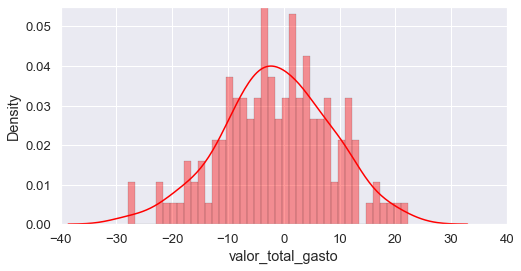

In [49]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v1), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

> **Análise**

Os resíduos são aproximadamente normalmente distribuídos, o que indica um bom ajuste do modelo. 

###  Modelo 2: Construção, Treinamento e Avaliação com Regressão Ridge

**Documentação**: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [50]:
# Cria o modelo
modelo_v2 = Ridge(alpha = 1.0)

In [51]:
# Treinamento
modelo_v2.fit(X_treino, y_treino)

Ridge()

In [52]:
print('Coeficientes: \n', modelo_v2.coef_)

Coeficientes: 
 [63.57245999 26.17198131 38.46758178  0.68013543]


In [53]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v2.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,63.572460
numero_medio_cliques_por_sessao,26.171981
tempo_total_logado_app,38.467582
tempo_total_logado_website,0.680135


In [54]:
# Previsões com dados de teste
pred_v2 = modelo_v2.predict(X_teste)
pred_v2[:10]

array([513.02461894, 593.71284026, 621.32208364, 495.83827761,
       641.71185412, 615.30802007, 591.87884788, 493.61867235,
       457.70805605, 531.9426755 ])

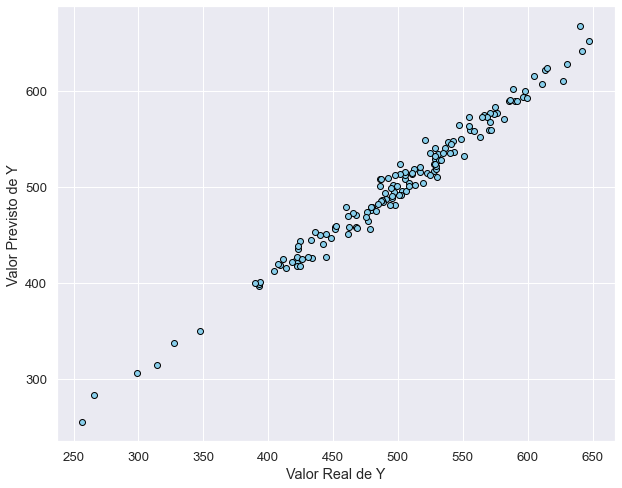

In [55]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v2, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [56]:
# MAE
mean_absolute_error(y_teste, pred_v2)

7.764151148981964

In [57]:
# MSE
mean_squared_error(y_teste, pred_v2)

94.93731602493463

In [58]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v2))

9.743578194120198

In [59]:
# Coeficiente R2
r2_score(y_teste, pred_v2)

0.981366052994101

In [60]:
# Variância Explicada
explained_variance_score(y_teste, pred_v2)

0.9817472659016085

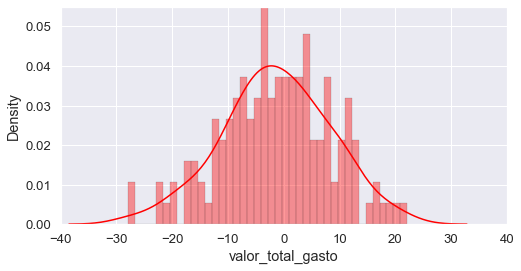

In [61]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v2), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

###  Modelo 3: Construção, Treinamento e Avaliação com Regressão LASSO

**Documentação**: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [62]:
# Cria o modelo
modelo_v3 = Lasso(alpha = 1.0)

In [63]:
# Treinamento
modelo_v3.fit(X_treino, y_treino)

Lasso()

In [64]:
print('Coeficientes: \n', modelo_v3.coef_)

Coeficientes: 
 [62.86344076 25.18747244 37.62149243  0.        ]


In [65]:
# Coeficientes
df_coef = pd.DataFrame(modelo_v3.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,62.863441
numero_medio_cliques_por_sessao,25.187472
tempo_total_logado_app,37.621492
tempo_total_logado_website,0.000000


In [66]:
# Previsões com dados de teste
pred_v3 = modelo_v3.predict(X_teste)
pred_v3[:10]

array([511.50216083, 591.78590214, 619.24047552, 497.55162062,
       640.89951717, 614.42803424, 590.05764493, 494.76617949,
       459.30498489, 529.64197449])

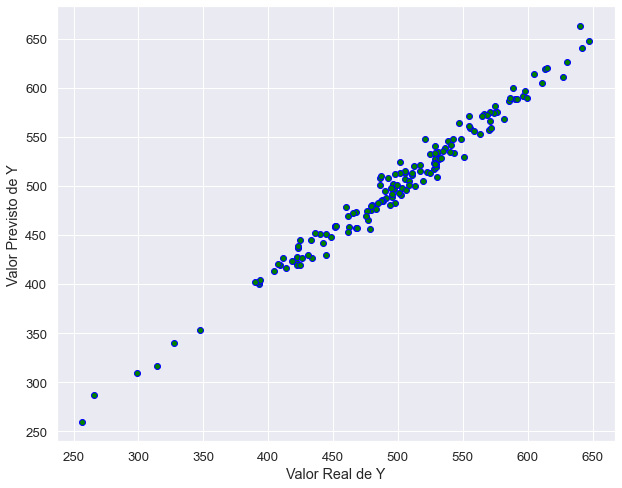

In [67]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v3, color = 'green', edgecolors = 'blue')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [68]:
# MAE
mean_absolute_error(y_teste, pred_v3)

7.788504696951063

In [69]:
# MSE
mean_squared_error(y_teste, pred_v3)

96.05606348970667

In [70]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v3))

9.800819531534426

In [71]:
# Coeficiente R2
r2_score(y_teste, pred_v3)

0.981146469358873

In [72]:
# Variância Explicada
explained_variance_score(y_teste, pred_v3)

0.9815600649101045

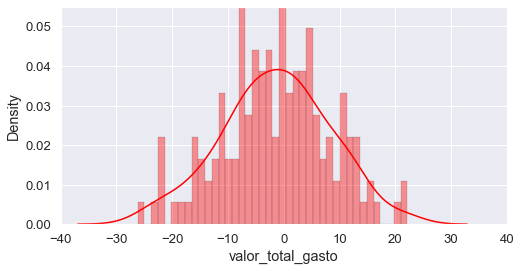

In [73]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v3), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

## Seleção do Modelo

In [74]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

In [75]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v1 = {'Nome'     : 'modelo_v1', 
                  'Algoritmo': 'Regressão Linear', 
                  'MAE'      : mean_absolute_error(y_teste, pred_v1),
                  'MSE'      : mean_squared_error(y_teste, pred_v1),
                  'RMSE'     : np.sqrt(mean_squared_error(y_teste, pred_v1)),
                  'R2'       : r2_score(y_teste, pred_v1)}                                    

In [76]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v1, ignore_index = True)

In [77]:
# Resultado do primeiro modelo no dataframe criado: olhar roc auc score
display(df_modelos)

,Nome,Algoritmo,MAE,MSE,RMSE,R2
0,modelo_v1,Regressão Linear,7.762419,94.956543,9.744565,0.981362


In [78]:
# Dicionário com as métricas do modelo_v2
dict_modelo_v2 = {'Nome'     : 'modelo_v2', 
                  'Algoritmo': 'Regressão Ridge', 
                  'MAE'      : mean_absolute_error(y_teste, pred_v2),
                  'MSE'      : mean_squared_error(y_teste, pred_v2),
                  'RMSE'     : np.sqrt(mean_squared_error(y_teste, pred_v2)),
                  'R2'       : r2_score(y_teste, pred_v2)}   

In [79]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v2, ignore_index = True)

In [80]:
# Resultado no modelo 2
display(df_modelos)

,Nome,Algoritmo,MAE,MSE,RMSE,R2
0,modelo_v1,Regressão Linear,7.762419,94.956543,9.744565,0.981362
1,modelo_v2,Regressão Ridge,7.764151,94.937316,9.743578,0.981366


In [81]:
# Dicionário com as métricas do modelo_v2
dict_modelo_v3 = {'Nome'     : 'modelo_v3', 
                  'Algoritmo': 'Regressão Lasso', 
                  'MAE'      : mean_absolute_error(y_teste, pred_v3),
                  'MSE'      : mean_squared_error(y_teste, pred_v3),
                  'RMSE'     : np.sqrt(mean_squared_error(y_teste, pred_v3)),
                  'R2'       : r2_score(y_teste, pred_v3)}   

In [82]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v3, ignore_index = True)

In [83]:
df_modelos.sort_values('RMSE')

,Nome,Algoritmo,MAE,MSE,RMSE,R2
1,modelo_v2,Regressão Ridge,7.764151,94.937316,9.743578,0.981366
0,modelo_v1,Regressão Linear,7.762419,94.956543,9.744565,0.981362
2,modelo_v3,Regressão Lasso,7.788505,96.056063,9.800820,0.981146


In [84]:
# Resultado no modelo 3
display(df_modelos)

,Nome,Algoritmo,MAE,MSE,RMSE,R2
0,modelo_v1,Regressão Linear,7.762419,94.956543,9.744565,0.981362
1,modelo_v2,Regressão Ridge,7.764151,94.937316,9.743578,0.981366
2,modelo_v3,Regressão Lasso,7.788505,96.056063,9.800820,0.981146


> **Análise**

* O **Modelo 3** apresentou uma taxa de erro (RMSE) levemente maior e pode ser descartado;

* Os **Modelo 1 e **Modelo 2** tiveram seus (RMSE) muito próximos. 

Sendo assim devemos escolher o modelo mais simples, que para esse em exemplo é o **MODELO 1**:  Regressão Linear (Benchmark)

## Conclusão

In [85]:
# Dados originais
dados.head()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075


In [86]:
# Coeficientes: padrão que buscamos para entender o relacionamento entre as variáveis
df_coef_final = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])

,Coeficiente
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


In [87]:
df_coef_final.sort_values('Coeficiente')

,Coeficiente
tempo_total_logado_website,0.684737
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_cadastro_cliente,63.742207


#### Interpretações dos Coeficientes (Padrão):

* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo de cadastro do cliente está associado a um aumento de R$ 63.74 no valor total gasto por cliente por mês;


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no número médio de cliques por sessão está associado a um aumento de R$ 26.24 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo total logado na app está associado a um aumento de R$ 38.57 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo total logado no web site está associado a um aumento de R$ 0.68 no valor total gasto por cliente por mês.

> **Diagnóstico**

* Podemos ver que será mais lucrativo para a empresa investir na atualização da sua app uma vez que o retorno será maior. 

* Além disso, é importante criar políticas para reter o cliente por mais tempo, já que isso também leva ao aumento das vendas. 

* A própria atualização da app será uma forma de reter o cliente por mais tempo.

* Não compensa, neste momento, investir na atualização do web site pois o retorno será mínimo.